# Epsilon=f(Plie)

Algo inf_bound (Aurélien bound vs Balle bound)

delta, tau, d et n fixes


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


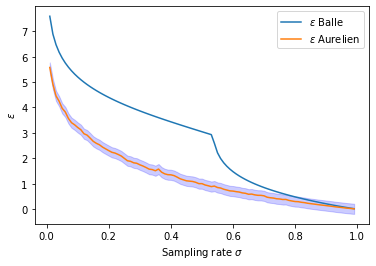

In [6]:
##################################################
# epsilon=f(plie) algo inf-bound
%load_ext autoreload
%autoreload 2
from Ploting import *
from Theorical_functions import *
from Serialization import *


tau=20
n=100
delta=1e-4
d=50
nb_runs=1000

 

erase=False 
x_coordinates = []
eps_balle=[]
eps_aurelien=[]


name='epsilon_f(plie)-inf-bound,tau_{},n_{},delta_{},d_{},nb_runs_{}'.format(tau,n,delta,d,nb_runs)

Plie=0.01 
if do_storage_exists(name+"2") and erase==False:
    
    eps_balle=restore(name+"1")
    eps_aurelien=restore(name+"2")
    while Plie < 1:
        print("Plie=",Plie,end="\r",flush=True)
        x_coordinates.append(Plie)
        Plie=round(Plie+0.01,2)
else:

    
    while Plie < 1:
        print("Plie=",Plie,end="\r",flush=True)
        x_coordinates.append(Plie)
        eps_balle.append(eps_algo(tau,n,d, Plie,delta))
        eps_aurelien.append(get_epsilon_Semi_TH_optimized(tau,Plie,n,d,delta,nb_runs))
        Plie=round(Plie+0.01,2)
    store(name+"1",eps_balle)
    store(name+"2",eps_aurelien)
           

plt.plot(x_coordinates, eps_balle, label="$\\varepsilon$ Balle")
plt.plot(x_coordinates, eps_aurelien, label="$\\varepsilon$ Aurelien")
plt.legend()
plt.xlabel('Sampling rate $\sigma$')
plt.ylabel('$\\varepsilon$')

#plt.title('$\\varepsilon$ en fonction du taux de sampling $\sigma$ Balle vs Aurelien')
saveFig(name)
##################################################














    

0.4501804897809363


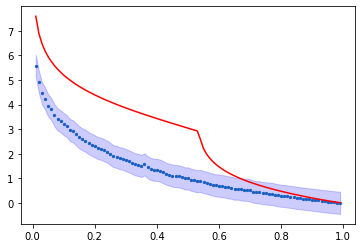

In [3]:
from matplotlib import pyplot as plt
import numpy as np

#some example data
x= x_coordinates
y = eps_aurelien
#some confidence interval
ci = 0.5 * np.std(y)/np.mean(y)
print(ci)
fig, ax = plt.subplots()
ax.scatter(x,y,s=5)
ax.plot(x,eps_balle, color="r")
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.2)

# Avec interval de confiance

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


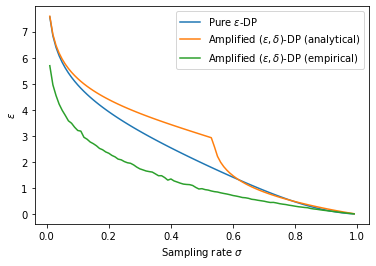

In [7]:
##################################################
# epsilon=f(plie) algo inf-bound
%load_ext autoreload
%autoreload 2
from Ploting import *
from Theorical_functions_IC import *
from Serialization_IC  import *


tau=20
n=100
delta=1e-4
d=50
nb_runs=2000
 

erase=False 
x_coordinates = []
eps_balle=[]
eps_aurelien=[]
eps_aurelien_min=[]
eps_aurelien_max=[]
eps_exact=[]
name='epsilon_f(plie)-inf-bound,tau_{},n_{},delta_{},d_{},nb_runs_{}'.format(tau,n,delta,d,nb_runs)

Plie=0.01 
if do_storage_exists(name+"2") and erase==False:
    
    eps_balle=restore(name+"1")
    eps_aurelien=restore(name+"2")
    eps_aurelien_min=restore(name+"3")
    eps_aurelien_max=restore(name+"4")
    while Plie <1:
        print("Plie=",Plie,end="\r",flush=True)
        x_coordinates.append(Plie)
        eps_exact.append(eps_algo_exact_formula(tau,n,d, Plie))
        Plie=round(Plie+0.01,2)
        
else:

    
    while Plie < 1:
        print("Plie=",Plie,end="\r",flush=True)
        x_coordinates.append(Plie)
        eps_balle.append(eps_algo(tau,n,d, Plie,delta))
        eps,eps_min,eps_max=get_epsilon_Semi_TH_optimized(tau,Plie,n,d,delta,nb_runs)
        eps_aurelien.append(eps)
        eps_aurelien_min.append(eps_min)
        eps_aurelien_max.append(eps_max)
        eps_exact.append(eps_algo_exact_formula(tau,n,d, Plie))
        Plie=round(Plie+0.01,2)
    store(name+"1",eps_balle)
    store(name+"2",eps_aurelien)
    store(name+"3",eps_aurelien_min)
    store(name+"4",eps_aurelien_max)
           

plt.plot(x_coordinates, eps_exact, label="Pure $\epsilon$-DP")
plt.plot(x_coordinates, eps_balle, label="Amplified $(\epsilon,\delta)$-DP (analytical)")
plt.plot(x_coordinates, eps_aurelien, label="Amplified $(\epsilon,\delta)$-DP (empirical)")

plt.legend()
plt.xlabel('Sampling rate $\sigma$')
plt.ylabel('$\\varepsilon$')
#plt.title('$\\varepsilon$ en fonction du taux de sampling $\sigma$ Balle vs Aurelien')

#plt.fill_between(x_coordinates, (eps_aurelien_min), (eps_aurelien_max), color='orange', alpha=.2)

saveFig(name)
##################################################














    